In [225]:
data = read.csv('../Datasets/2017_PUDB_Export.csv')

In [226]:
# Calculates the distribution and plots a pie chart
plot_pie_chart = function(field, x_axis = "Value", y_axis = "Count", title = "Distribution")
{
    unique_values = unique(field)
    print(unique_values)
    freq_table = as.data.frame(table(field))
    pie(freq_table[,c('Freq')], unique_values, xlab = x_axis, ylab = y_axis, main = title)
}

In [227]:
# Calculates the distribution and plots a bar chart
plot_bar_chart = function(field, x_axis = "Value", y_axis = "Count", title = "Distribution")
{
    unique_values = unique(field)
    freq_table = as.data.frame(table(field))
    barplot(freq_table[,c('Freq')], names.arg = unique_values,
            xlab = x_axis, ylab = y_axis, main = title)
}

In [228]:
print(paste("Number of columns -", length(data)))
print(paste("Number of records -", nrow(data)))

[1] "Number of columns - 82"
[1] "Number of records - 55990"


In [229]:
unique(data$Year)
# Data consists of loan details in the year 2017 only
# Column - Year can be removed
data = subset(data, select = -c(Year))

[1] 2017

In [230]:
length(unique(data$Assigned.ID)) == nrow(data)
# Assigned.ID is the primary key

[1] TRUE

 [1] "Atlanta"       "Boston"        "Chicago"       "Cincinnati"   
 [5] "Dallas"        "Des Moines"    "Indianapolis"  "New York"     
 [9] "Pittsburgh"    "San Francisco" "Topeka"       


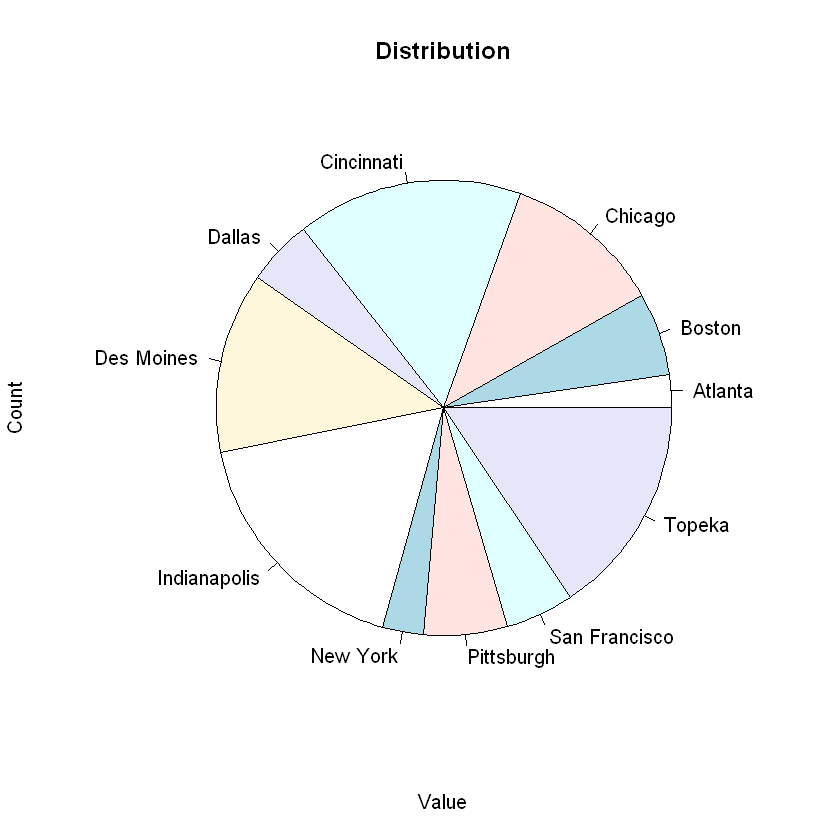

In [231]:
# Distibution of data among various banks
plot_pie_chart(data$Bank)

In [232]:
# Columns such as FIPSStateCode, FIPSCountyCode, FeatureID and Tract as redundant with MSA
# We are dropping all these columns and keeping MSA for clustering records of same economical background
data = subset(data, select = -c(FIPSStateCode, FIPSCountyCode, FeatureID, Tract))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    5.38   11.39   18.44   23.58  100.00 

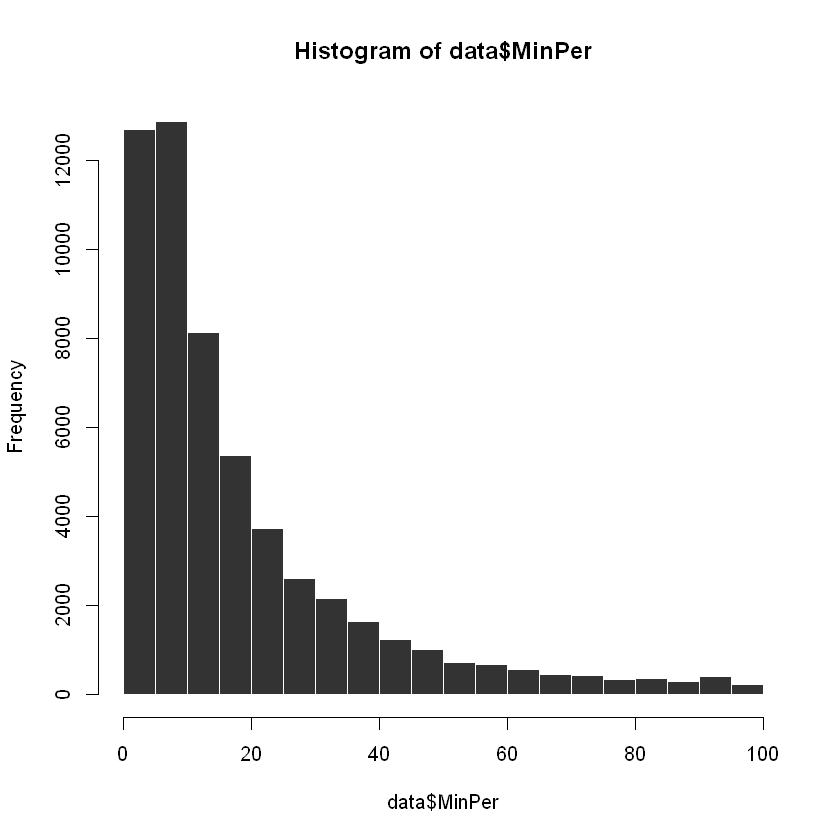

In [233]:
hist(data$MinPer, col="#333333", border="white")
summary(data$MinPer)
# Average percentage of minority in the given data is 18.44%

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.9386  1.1100  1.1763  1.3600  3.9037 

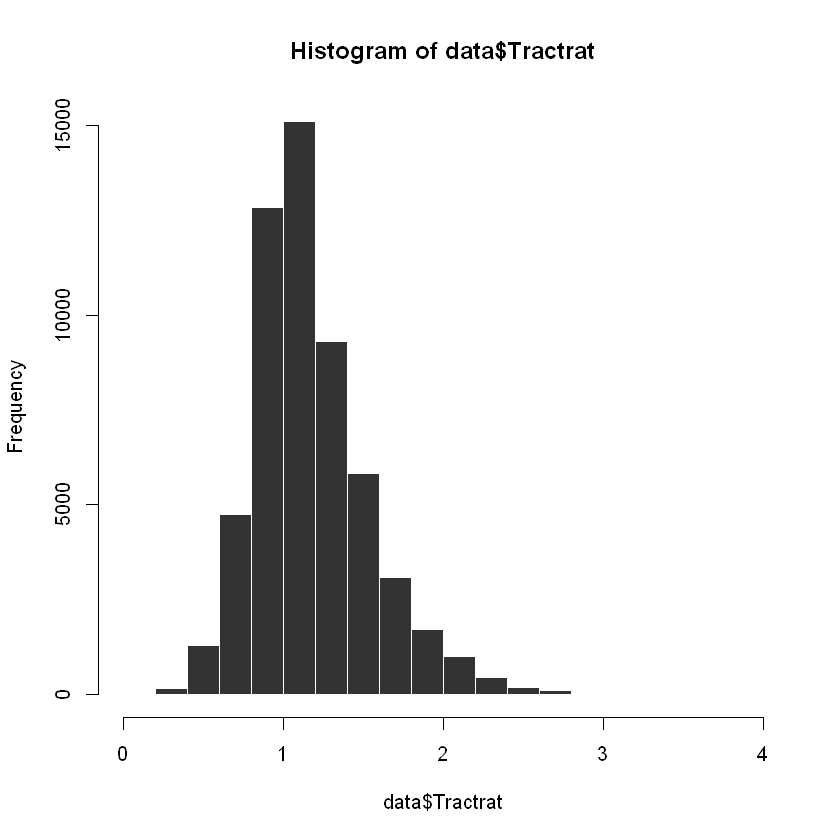

In [234]:
hist(data$Tractrat, col="#333333", border="white")
summary(data$Tractrat)
# Tractrat = Tract Median family income / MSA Median family income
# Tract of 0.75 => Tract's income is 75% of the local area median income

# This is the ratio used to determine whether the census tract qualifies as
# a low-income area for purposes of the single-family low-income areas housing goal.

# From the summary, 1st quartile = 0.94
# We can infer that less than 25% of the population in our data is in low-income area

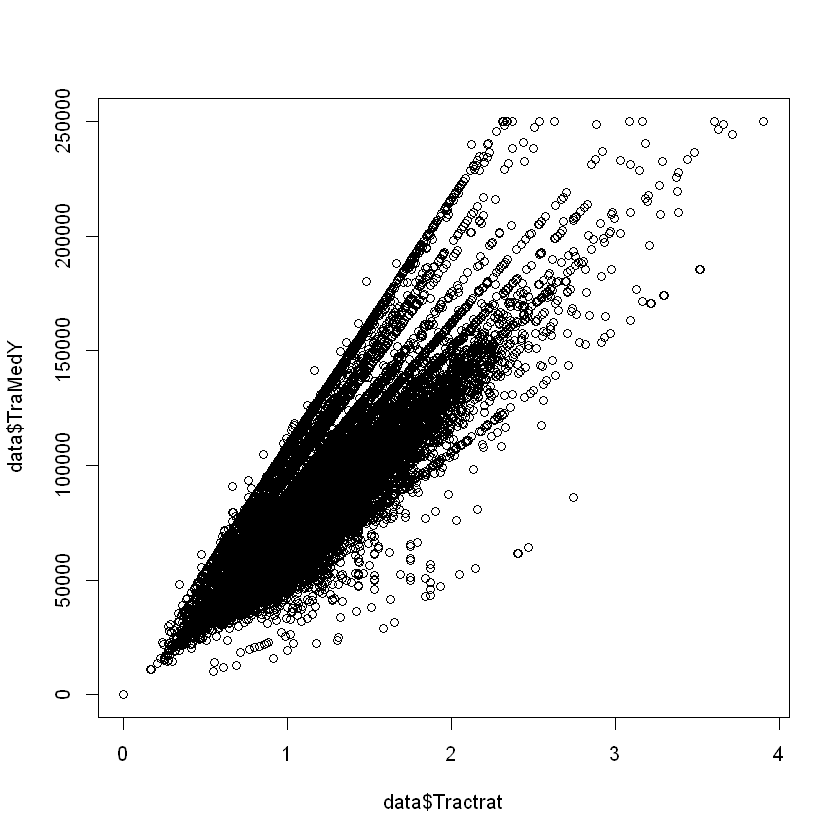

In [235]:
plot(data$Tractrat, data$TraMedY)
# linearly dependant => can remove TraMedY

In [236]:
# TraMedY - Census Tract Median Family Income in Whole Dollars
# LocMedY - Local Area(demarked by MSA) Median Income in Whole Dollars
# Tractrat is the fraction of these two attributes, hence they can remove too
data = subset(data, select = -c(TraMedY))


  The decimal point is 5 digit(s) to the right of the |

   0 | 00011111111111111111111111111111111111111122222222222222222222222222+50747
   2 | 00000000000000000000000000000000000000000000000000000000000000000000+4532
   4 | 00000000000000000000000000000000000000000000011111111111111111111111+308
   6 | 00000000011122222333333334444444555566667777778888999999000122334444
   8 | 000000113333344555666677900111222256678
  10 | 013357823346778
  12 | 0035799
  14 | 345801
  16 | 3828
  18 | 7
  20 | 6022
  22 | 7
  24 | 
  26 | 7
  28 | 58
  30 | 
  32 | 9
  34 | 
  36 | 9
  38 | 5
  40 | 
  42 | 1



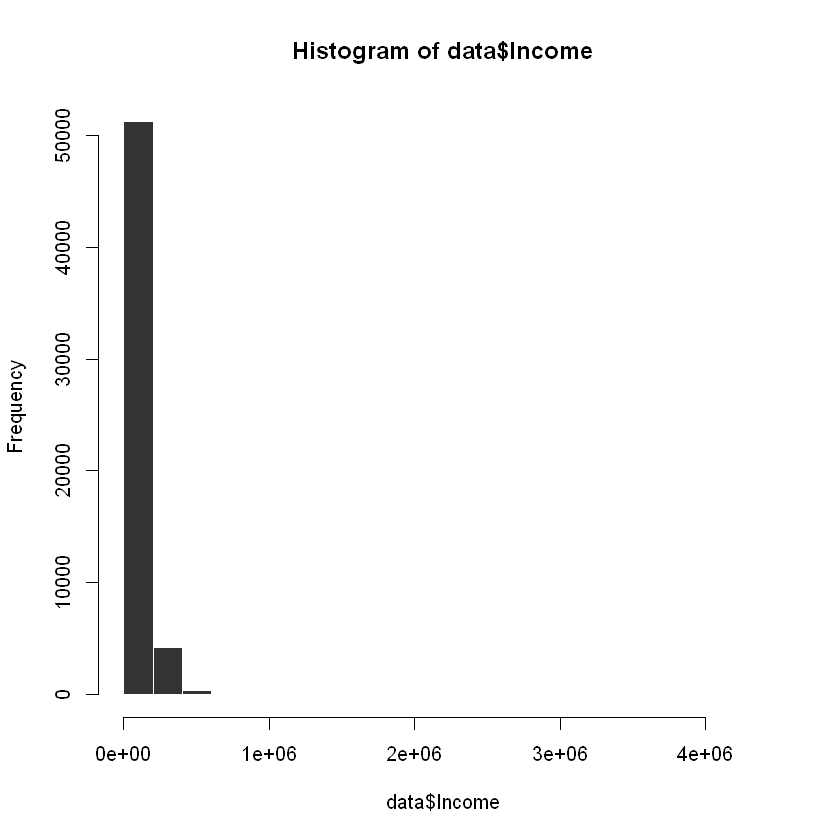

In [237]:
stem(data$Income)
hist(data$Income, col="#333333", border="white")

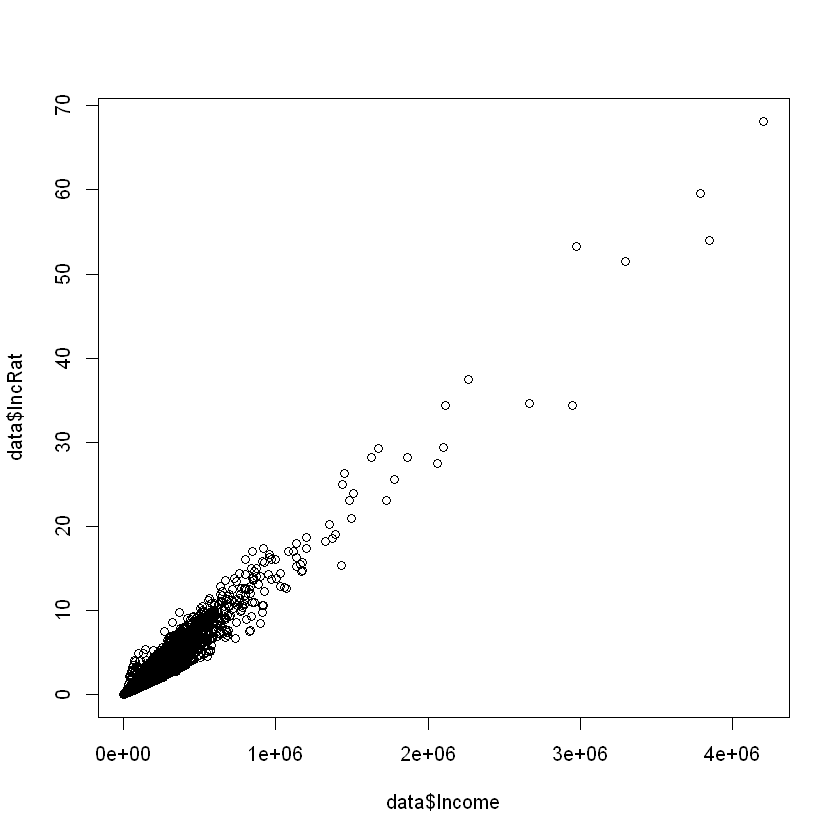

In [238]:
plot(data$Income, data$IncRat)
# Would it be wise to remove Income? we will be retaining the relative income


  The decimal point is at the |

   8 | 134
   8 | 6
   9 | 12222334444444
   9 | 55555555555666666666666666666666666677777777777777777777777777777777+182
  10 | 00000000000000000000000000000000000000000000000000000000000000000000+2410
  10 | 55555555555555555555555555555555555555555555555555555555555555555555+9443
  11 | 00000000000000000000000000000000000000000000000000000000000000000000+16531
  11 | 55555555555555555555555555555555555555555555555555555555555555555555+17274
  12 | 00000000000000000000000000000000000000000000000000000000000000000000+7528
  12 | 55555555555555555555555555555555555555555555555555555555555555555555+1592
  13 | 00000000000000000000000000000000000000000000000000000000000000000000+264
  13 | 55555555555555555666666666666666666666677777777777777777778888888889
  14 | 0000001111122222233444
  14 | 56666899
  15 | 0123



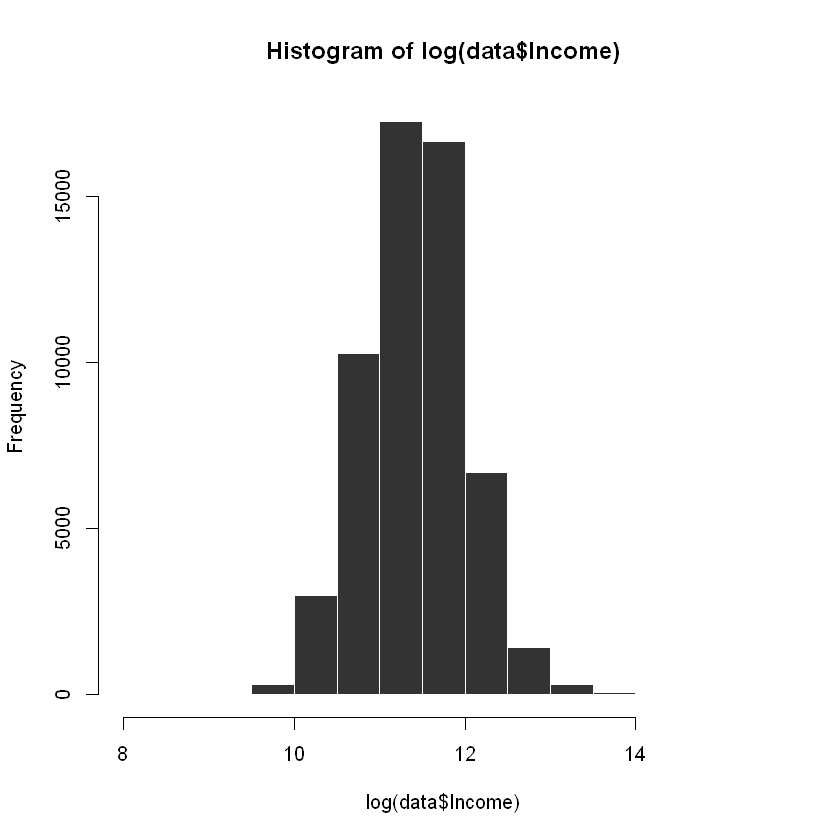

In [239]:
stem(log(data$Income))
hist(log(data$Income), col="#333333", border="white")


  The decimal point is at the |

  -3 | 3
  -2 | 76
  -2 | 410
  -1 | 98877777666666666555555555555555
  -1 | 44444444444444444444444444444444443333333333333333333333333333333333+581
  -0 | 99999999999999999999999999999999999999999999999999999999999999999999+4871
  -0 | 44444444444444444444444444444444444444444444444444444444444444444444+11632
   0 | 00000000000000000000000000000000000000000000000000000000000000000000+17401
   0 | 55555555555555555555555555555555555555555555555555555555555555555555+15060
   1 | 00000000000000000000000000000000000000000000000000000000000000000000+4640
   1 | 55555555555555555555555555555555555555555555555555555555555555555555+872
   2 | 00000000000000000000000000000000000000000000000000000000000000000000+169
   2 | 555555555555555556666666666666677777777777788888888888899999999
   3 | 0011222333344
   3 | 555569
   4 | 0012



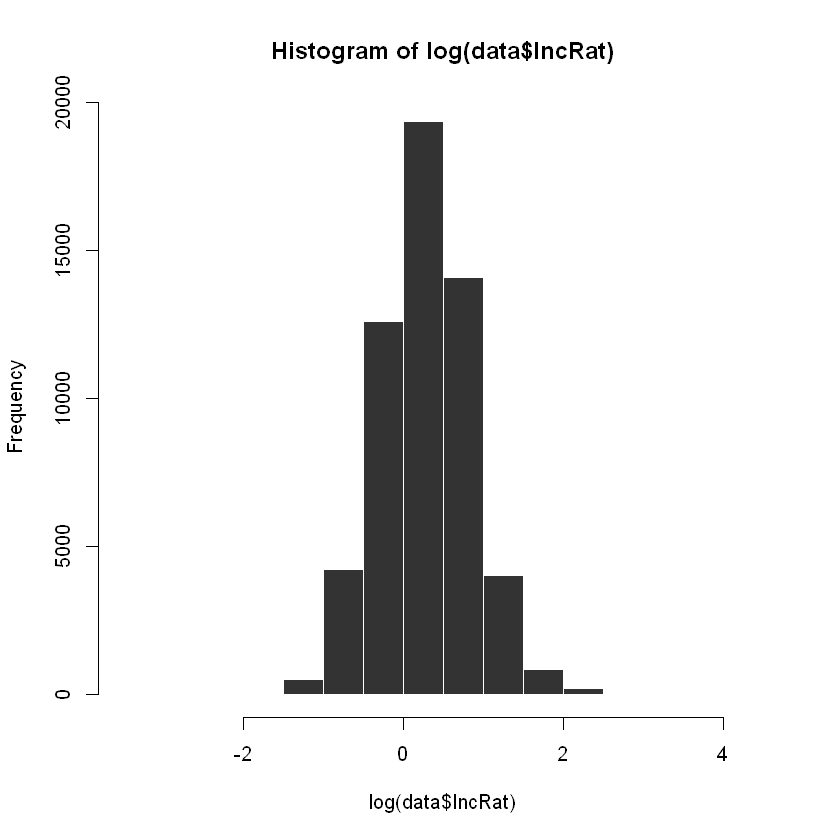

In [240]:
hist(log(data$IncRat), col="#333333", border="white")
stem(log(data$IncRat))

# IncRate = Income / CurAreY

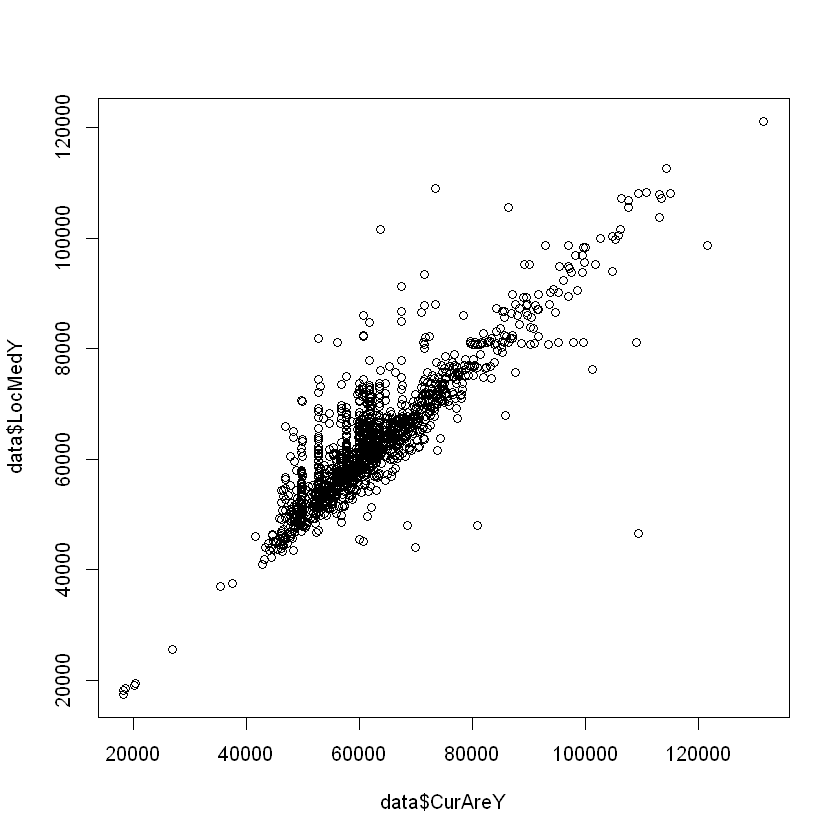

In [241]:
plot(data$CurAreY, data$LocMedY)
# They are linearly dependent on each other, we will remove CurArey

data = subset(data, select = -c(CurAreY))

In [242]:
print(length(which(data$MortData != data$AcquData)))
# Mortgage and Acquisition dates are same for all instance, can merge the columns
unique(data$AcquDate)
# It has only one unique value - 2017 : remove both the columns
data = subset(data, select = -c(MortDate, AcquDate))

[1] 0


[1] 2017

[1] 2 1 4


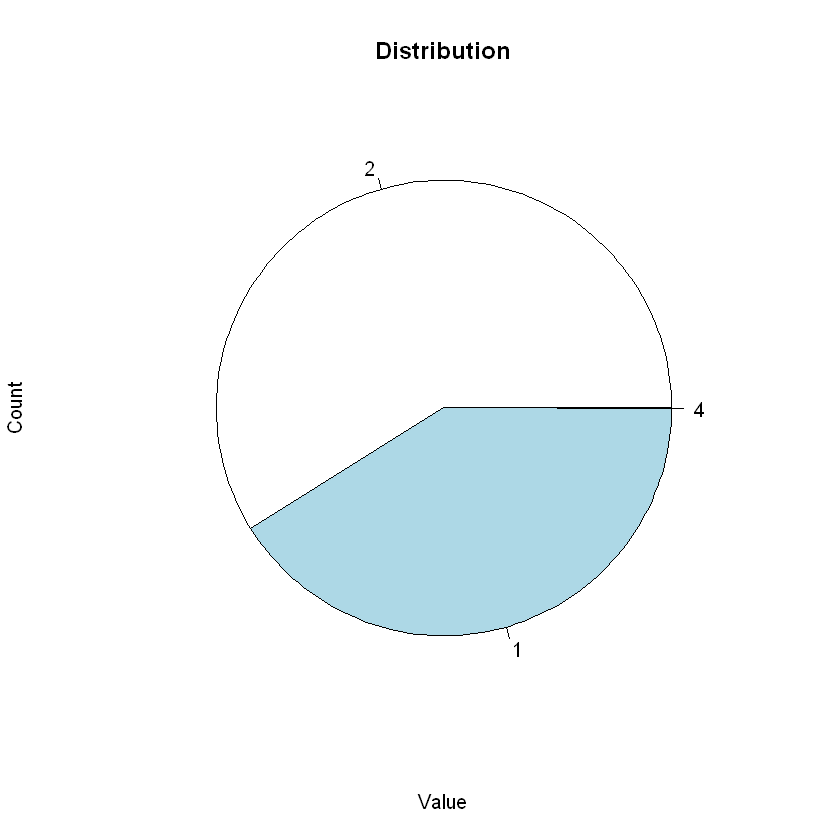

In [243]:
plot_pie_chart(data$Purpose)
# 2 - refinancing
# 1 - purchase
# 4 - new construction

# Purpose of home loan is no very insightful, hence can be removed
data = subset(data, select = -c(Purpose))

In [244]:
unique(data$Coop)
# Coop : 2 => not a co-operative mortgage loan
# Attribute can be removed, has only one value throughout the dataset
data = subset(data, select = -c(Coop))

[1] 2

In [245]:
unique(data$Product)
# Product : 1 => fixed type
# Attribute can be removed, has only one value throughout the dataset
data = subset(data, select = -c(Product))

[1] 1

[1] 2 1 3 0


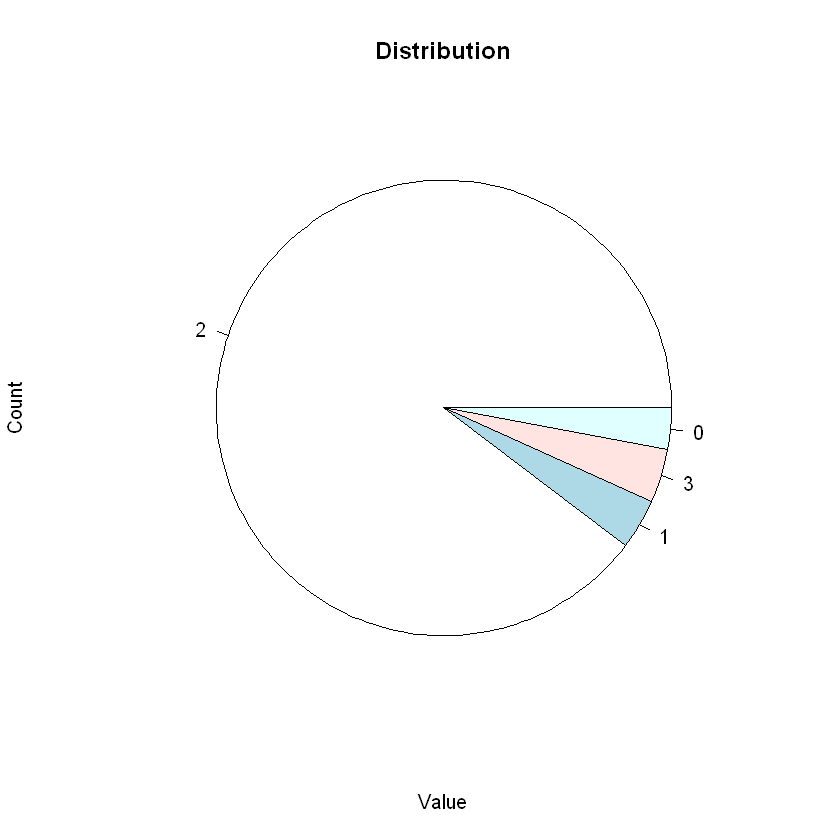

In [246]:
plot_pie_chart(data$FedGuar)
# Federal Guarantee
# 0 - No federal guarantee
# 1 - FHA
# 2 - VA
# 3 - FMHA for rural housing loans

 [1] 180 360 240 300 228 120 204 276 314  60 216 132 336 333 144 309 342 348 283
[20] 344 310 331 305 324 321 294 354 349 312 346 320 343 293 335 273 252 356 345
[39] 351 350 287 319 337 268 347 288 357 266 330 326 322 353 250 327 282 332 232
[58] 304 334 318 235 295 359 274 328 156 258 338 329 323  72  84 358 316 339 229
[77] 352  96 123 108 165  99 264 313 110 355 173 233 174 179 239 176 234  62


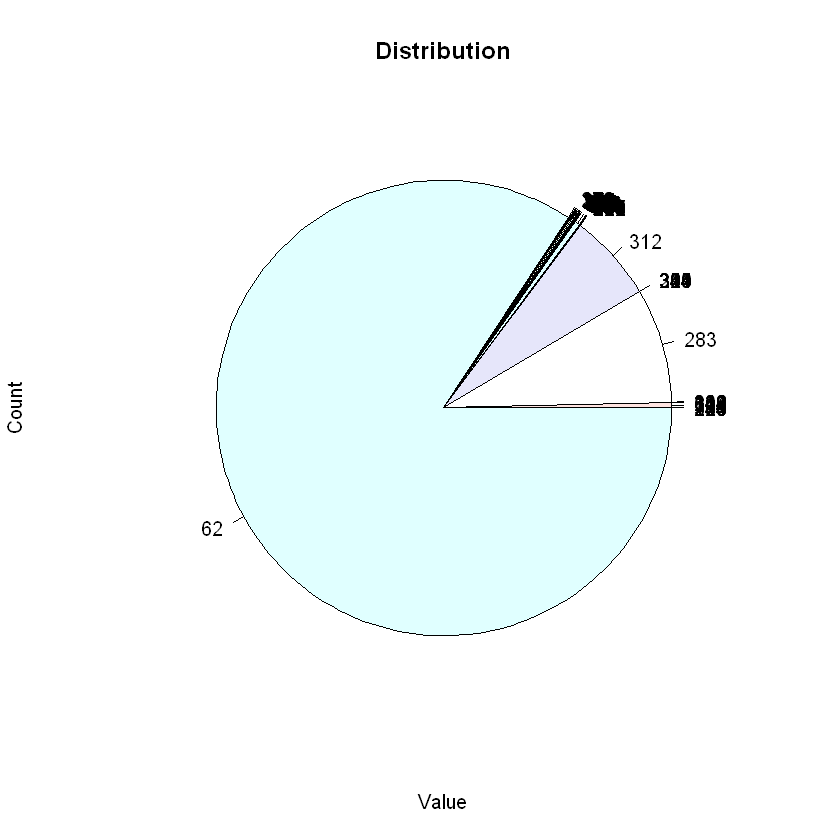

In [247]:
plot_pie_chart(data$Term)

In [248]:
print(length(which(data$Term != data$AmorTerm)))
# Loan term and acquisition term remains the same
# Amortization term can be removed
data = subset(data, select = -c(AmorTerm))

[1] 0


In [249]:
unique(data$SellType)
# SeelType : 1 => Insured depository institue
# Attribute can be removed, has only one value throughout the dataset
data = subset(data, select = -c(SellType))

[1] 1

Var1,Freq
<fct>,<int>
1,24669
2,31041
3,226
4,54


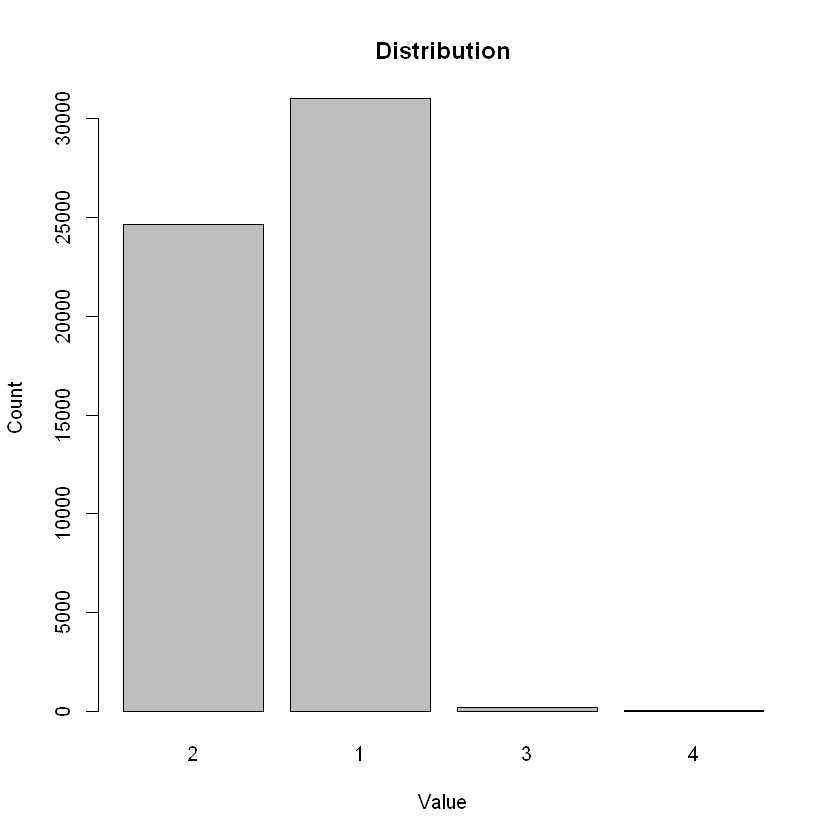

In [250]:
plot_bar_chart(data$NumBor)
as.data.frame(table(data$NumBor))

Var1,Freq
<fct>,<int>
1,11552
2,44438


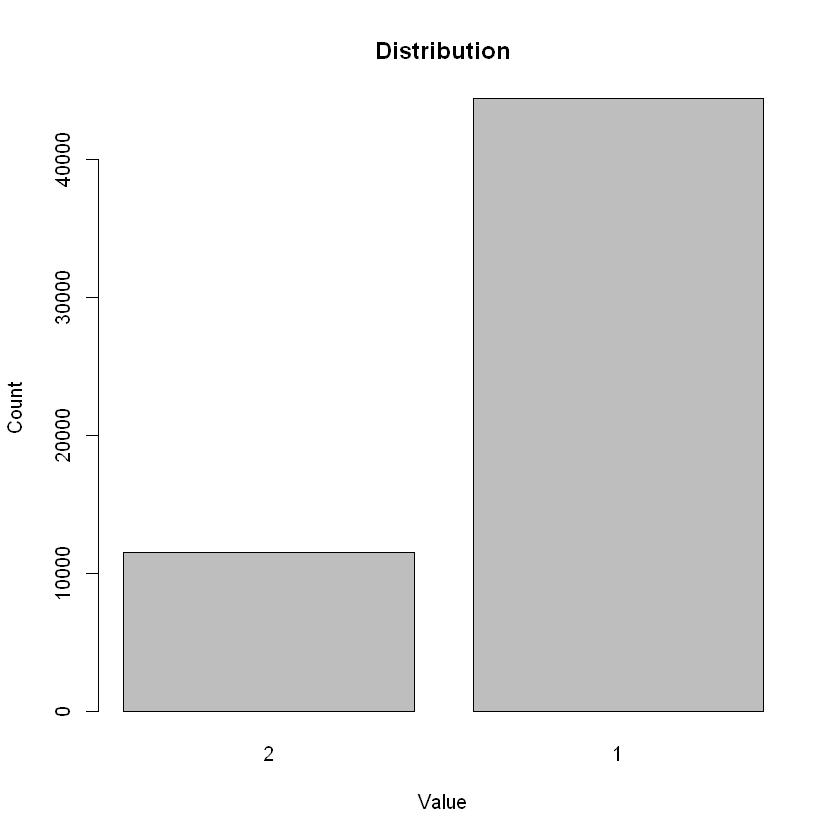

In [251]:
plot_bar_chart(data$First)
as.data.frame(table(data$First))

In [252]:
as.data.frame(table(data$CoAge))
as.data.frame(table(data$CoRace))
as.data.frame(table(data$CoGender))
# Majority of the fields are missing, remove the columns

data = subset(data, select = -c(CoAge, CoRace, CoGender))

Var1,Freq
<fct>,<int>
19,8
20,34
21,59
22,131
23,239
24,380
25,457
26,574
27,700


Var1,Freq
<fct>,<int>
1,103
2,1176
3,403
4,101
5,26898
7,2640
8,24669


Var1,Freq
<fct>,<int>
1,5136
2,24416
3,1769
4,24669


In [253]:
unique(data$CICA)
as.data.frame(table(data$CICA))

# majority of the projects are not on a project funded under AHP, CIP, or CICA and missing
# the column can be safely removed too

data = subset(data, select = -c(CICA))

[1] 9 2 1

Var1,Freq
<fct>,<int>
1,116
2,23
9,55851


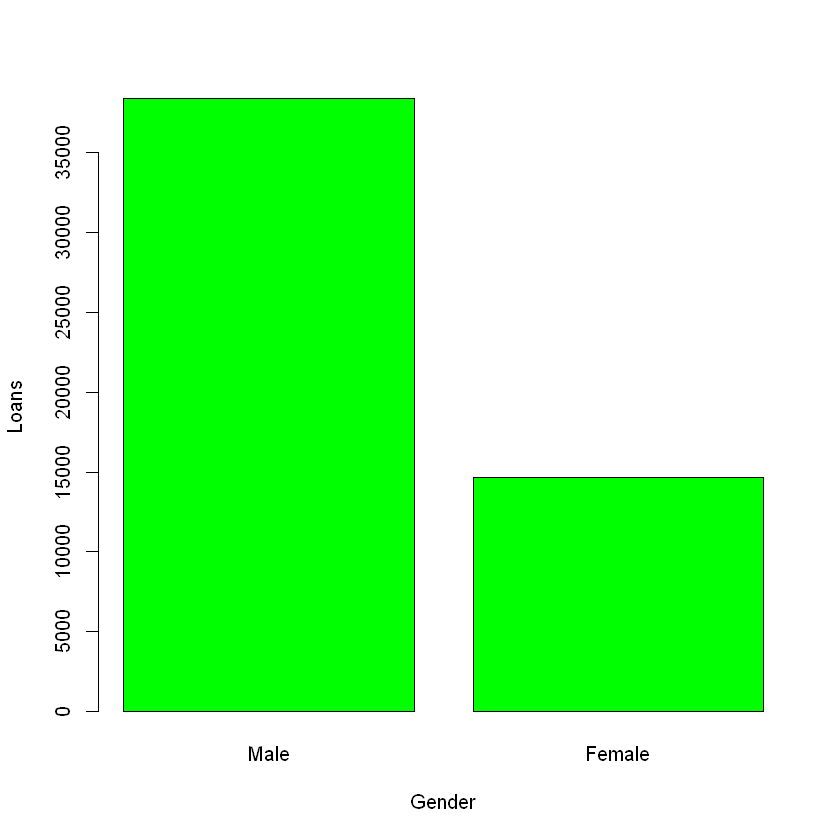

In [254]:
# Create the data for the chart
males = sum(data$BoGender == 1)
females = sum(data$BoGender == 2)
X <- c("Male", "Female")
Y <- c(males, females)

# Plot the bar chart 
barplot(Y,names.arg=X,xlab="Gender",ylab="Loans",col="green")

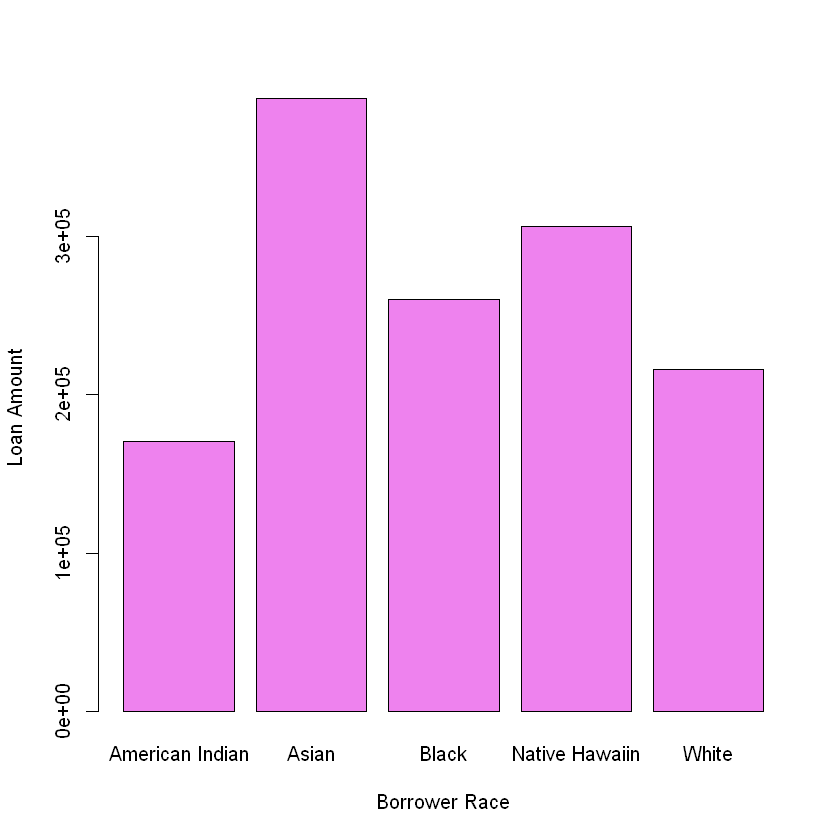

In [255]:
americanIndian = mean((data[data$BoRace==1,])$UPB)
asian = mean((data[data$BoRace==2,])$UPB)
black = mean((data[data$BoRace==3,])$UPB)
nativeHawaiin = mean((data[data$BoRace==4,])$UPB)
white = mean((data[data$BoRace==5,])$UPB)

# Create the data for the chart
X <- c("American Indian", "Asian", "Black", "Native Hawaiin", "White")
Y <- c(americanIndian, asian, black, nativeHawaiin, white)

# Plot the bar chart 
barplot(Y,names.arg=X,xlab="Borrower Race",ylab="Loan Amount",col="violet")

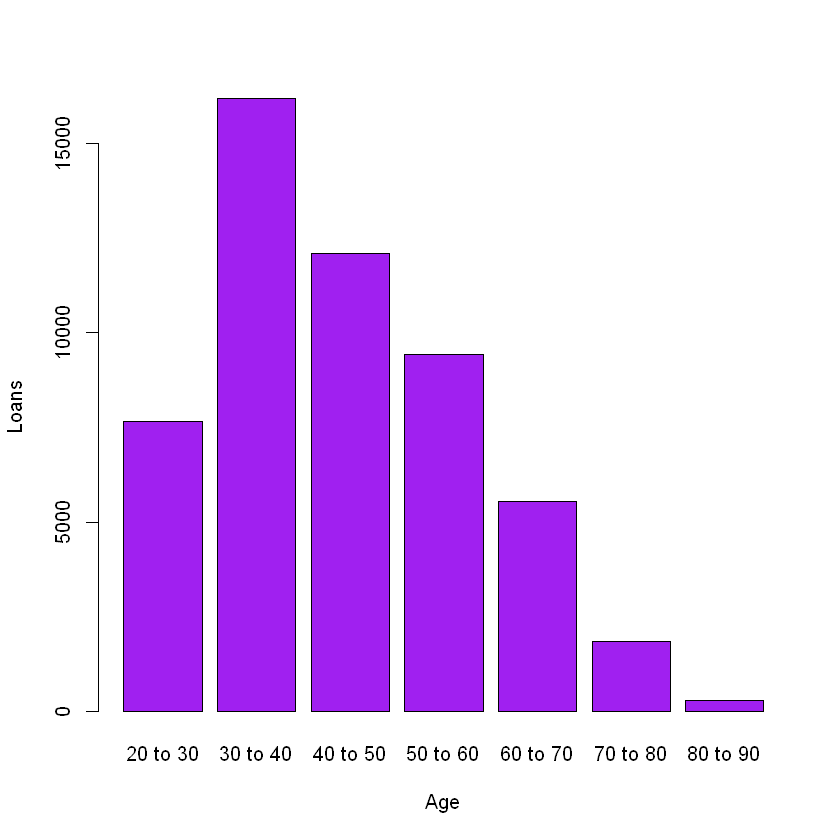

In [256]:
age20to30 = sum(data$BoAge>=20 & data$BoAge<30)
age30to40 = sum(data$BoAge>=30 & data$BoAge<40)
age40to50 = sum(data$BoAge>=40 & data$BoAge<50)
age50to60 = sum(data$BoAge>=50 & data$BoAge<60)
age60to70 = sum(data$BoAge>=60 & data$BoAge<70)
age70to80 = sum(data$BoAge>=70 & data$BoAge<80)
age80to90 = sum(data$BoAge>=80 & data$BoAge<90)

ys <- c(age20to30, age30to40, age40to50, age50to60, age60to70, age70to80, age80to90)
xs <- c("20 to 30","30 to 40","40 to 50","50 to 60","60 to 70","70 to 80","80 to 90")

barplot(ys,names.arg=xs,xlab="Age",ylab="Loans",col="purple")

In [257]:
unique(data$Aff1)
unique(data$Aff2)
unique(data$Aff3)
unique(data$Aff4)
# All the records are from an Insured Acquiring Institute
data = subset(data, select = -c(Aff1,Aff2, Aff3, Aff4))

[1] 2

[1] 2

[1] 2

[1] 2

In [258]:
unique(data$Bed1)
unique(data$Bed2)
unique(data$Bed3)
unique(data$Bed4)
# All the records show the beds are occupied by the owner only

as.data.frame(table(data$Bed1))
# Only one record has rent, hence only 1 record has 2 beds occupied by non-owner

data = subset(data, select = -c(Bed1, Bed2, Bed3, Bed4))

[1] 98  2

[1] 98

[1] 98

[1] 98

Var1,Freq
<fct>,<int>
2,1
98,55989


In [259]:
unique(data$Rent1)
unique(data$Rent2)
unique(data$Rent3)
unique(data$Rent4)

as.data.frame(table(data$Bed1))
# Only one record has rent, all the other houses are not under rent

data = subset(data, select = -c(Rent1, Rent2, Rent3, Rent4))

[1] 1.000e+10 1.295e+03

[1] 1e+10

[1] 1e+10

[1] 1e+10

Freq
<int>


In [260]:
unique(data$Rent1 - data$RentUt1)
unique(data$Rent2 - data$RentUt2)
unique(data$Rent3 - data$RentUt3)
unique(data$Rent4 - data$RentUt4)

# Shows no difference between Normal rent and Rent+utilities
# Hence columns RentUt1, RentUt2, RentUt3 and RentUt4 is removed

data = subset(data, select = -c(RentUt1, RentUt2, RentUt3, RentUt4))

numeric(0)

numeric(0)

numeric(0)

numeric(0)

In [261]:
as.data.frame(table(data$Occup))
# Majority of records are occupied by the owner, can be removed too

data = subset(data, select = -c(Occup))

Var1,Freq
<fct>,<int>
1,54709
2,1280
3,1


In [262]:
as.data.frame(table(data$NumUnits))
# Majority of records have only 1 unit, can be removed too

data = subset(data, select = -c(NumUnits))

Var1,Freq
<fct>,<int>
1,55479
2,438
3,45
4,28


In [263]:
as.data.frame(table(data$ArmMarg))
as.data.frame(table(data$ArmIndex))
as.data.frame(table(data$PrepayP))
# all the record values are invalid and missing, can be removed

data = subset(data, select = -c(ArmMarg, ArmIndex, PrepayP))

Var1,Freq
<fct>,<int>
99999,55990


Var1,Freq
<fct>,<int>
99,55990


Var1,Freq
<fct>,<int>
12/31/9999,55990


[1] 2 1


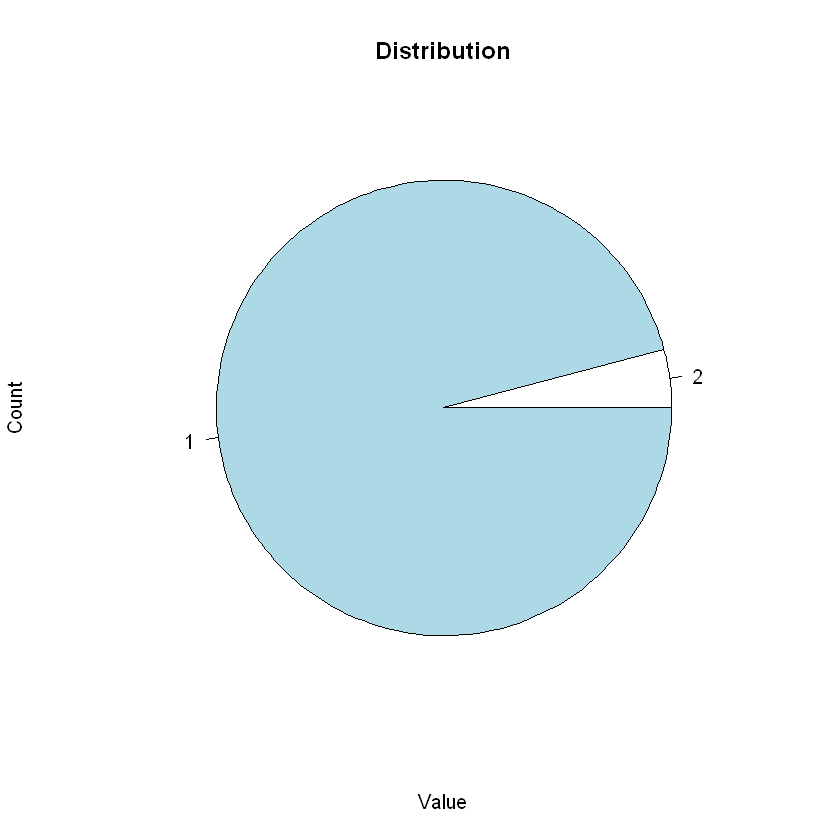

In [264]:
plot_pie_chart(data$Geog)
# majority of the property in our dataset is in census tracts annually classified as underserved by HUD

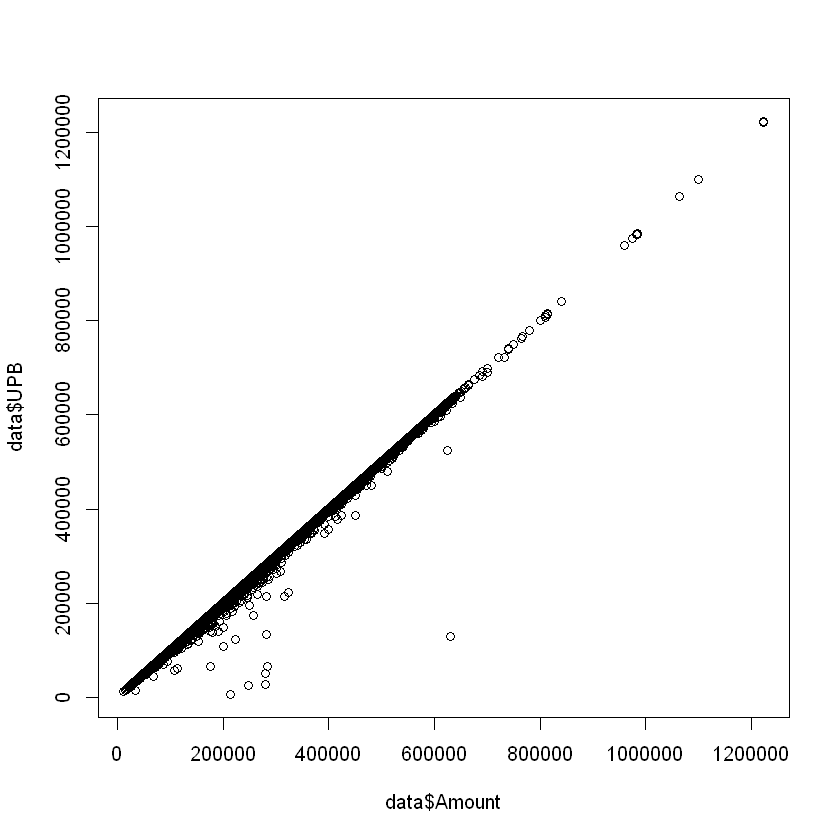

In [265]:
plot(data$Amount, data$UPB)
# shows a linear relation, hence can be removed too

data = subset(data, select = -c(Amount))

[1] 5 4 3 2 1 9
[1] 5 4 9 2 3 1


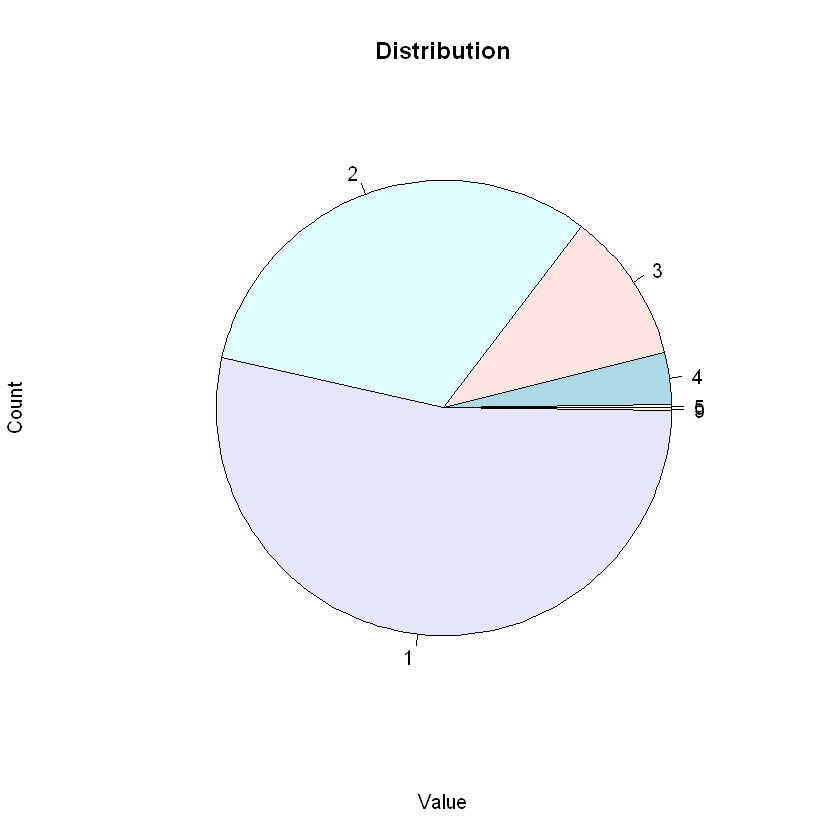

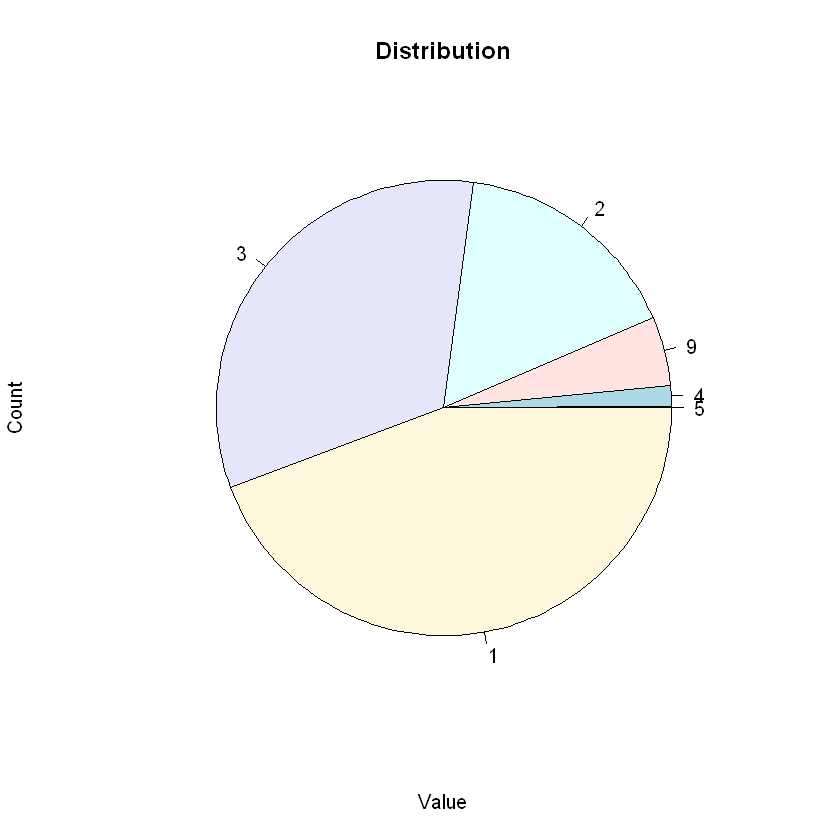

In [266]:
plot_pie_chart(data$BoCreditScor)
plot_pie_chart(data$CoBoCreditScor)

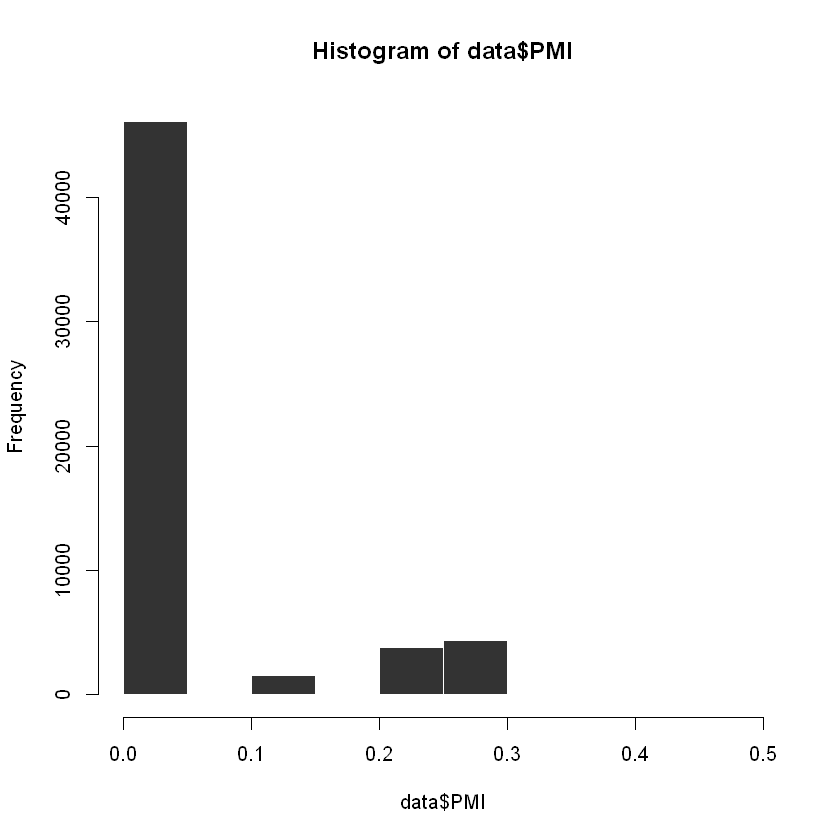

In [267]:
hist(data$PMI, col="#333333", border="white")
# Histogram shows distribution of the percentage of loan covered by insurance

[1] 2 1


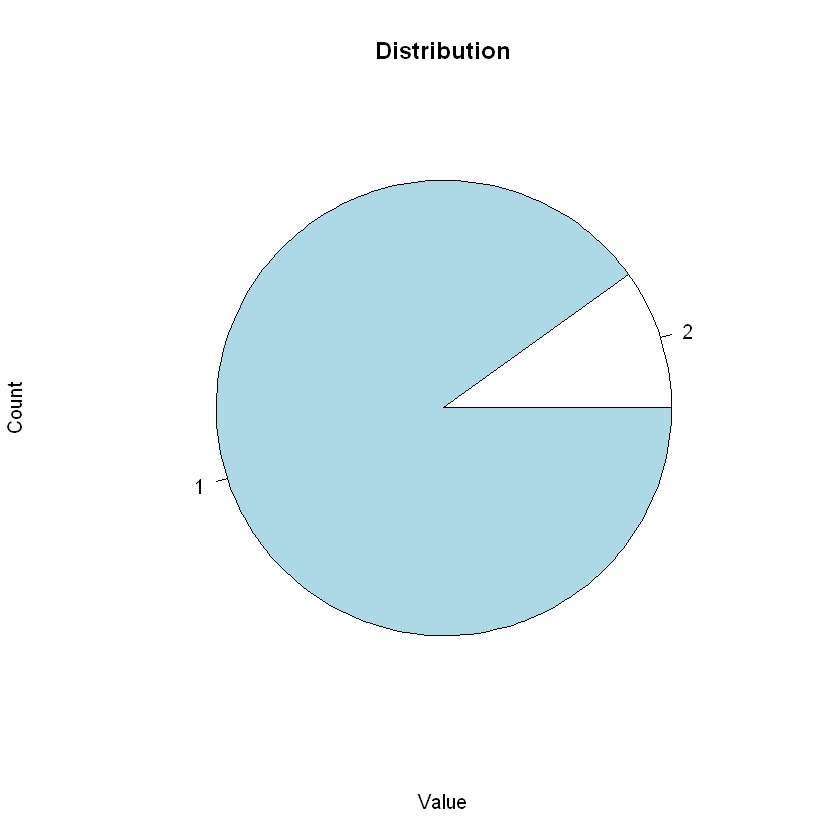

In [268]:
plot_pie_chart(data$Self)
# Majority of the borrowers are self employed

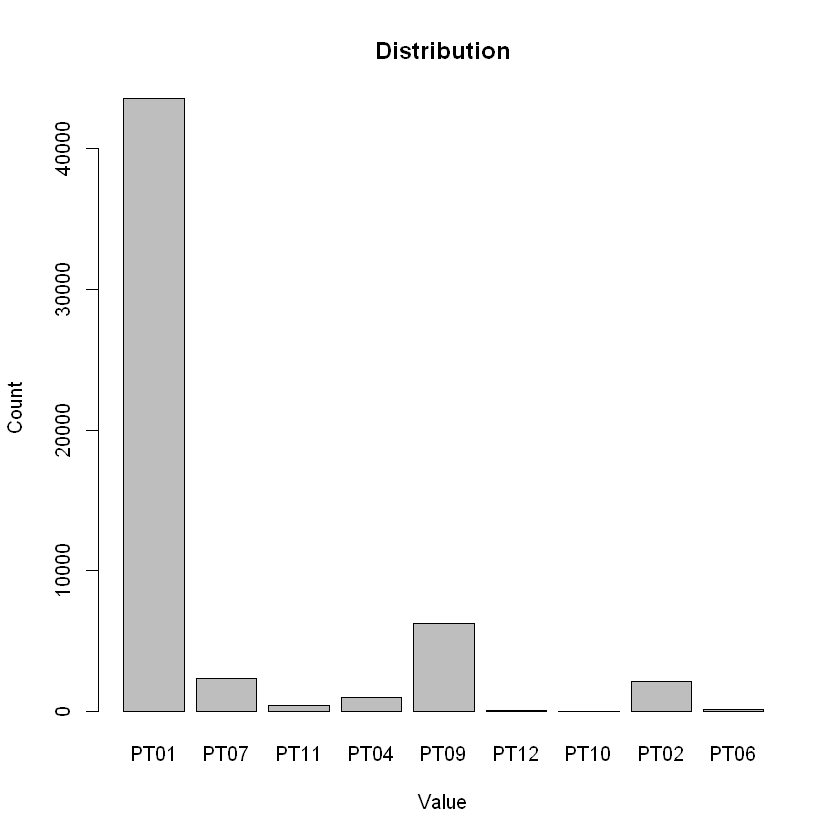

In [269]:
plot_bar_chart(data$PropType)

In [270]:
as.data.frame(table(data$CoEth))
# Many missing values, remove the column

data = subset(data, select = -c(CoEth))

Var1,Freq
<fct>,<int>
1,1063
2,27554
3,2704
5,24669


In [271]:
print(length(which(data$Race2 != data$Race3)))
print(length(which(data$Race2 != data$Race4)))
print(length(which(data$Race2 != data$Race5)))

print(length(which(data$Race3 != data$Race4)))
print(length(which(data$Race3 != data$Race5)))

print(length(which(data$Race4 != data$Race5)))

# very little difference between Race2, Race3 and Race5
# better to remove Race2, Race3 and Rac4

data = subset(data, select = -c(Race2, Race3, Race4, Race5))

[1] 362
[1] 362
[1] 362
[1] 8
[1] 8
[1] 2


In [272]:
print(length(which(data$Corace2 != data$Corace3)))
print(length(which(data$Corace2 != data$Corace4)))
print(length(which(data$Corace2 != data$Corace5)))

print(length(which(data$Corace3 != data$Corace4)))
print(length(which(data$Corace3 != data$Corace5)))

print(length(which(data$Corace4 != data$Corace5)))

# no difference between Corace2, Corace3 and Corace5
# better to remove Corace2, Corace3 and Rac4

data = subset(data, select = -c(Corace2, Corace3, Corace4, Corace5))

[1] 60
[1] 60
[1] 60
[1] 3
[1] 3
[1] 0


In [273]:
as.data.frame(table(data$CoBoCreditScor))
# Many missing values, remove the column

data = subset(data, select = -c(CoBoCreditScor))

Var1,Freq
<fct>,<int>
1,57
2,844
3,2724
4,9234
5,18307
9,24824


In [274]:
unique(data$HOEPA)
# All under 2 - Not subjected to HOEPA act
# Column can be removed

unique(data$LienStatus)
# All under 1 - Secured by first loan liens
# Column can be removed

unique(data$FedFinStbltyPlan)
# All under 2 - No stability plan
# Column can be removed

unique(data$GSEREO)
# All under 2 - not owned by GSE
# Column can be removed

data = subset(data, select = -c(HOEPA, LienStatus, FedFinStbltyPlan, GSEREO))

[1] 2

[1] 1

[1] 2

[1] 2

[1] 2 1


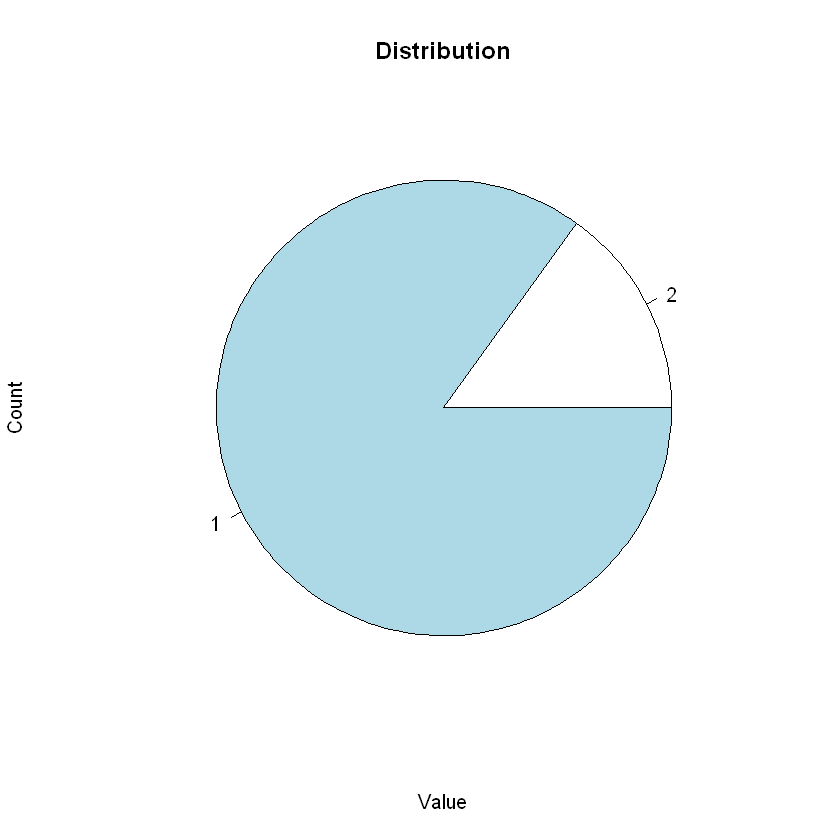

In [275]:
plot_pie_chart(data$SpcHsgGoals)
# 1 - Special housing loan goals
# 2 - No special housing loan goals

[1] 1 4


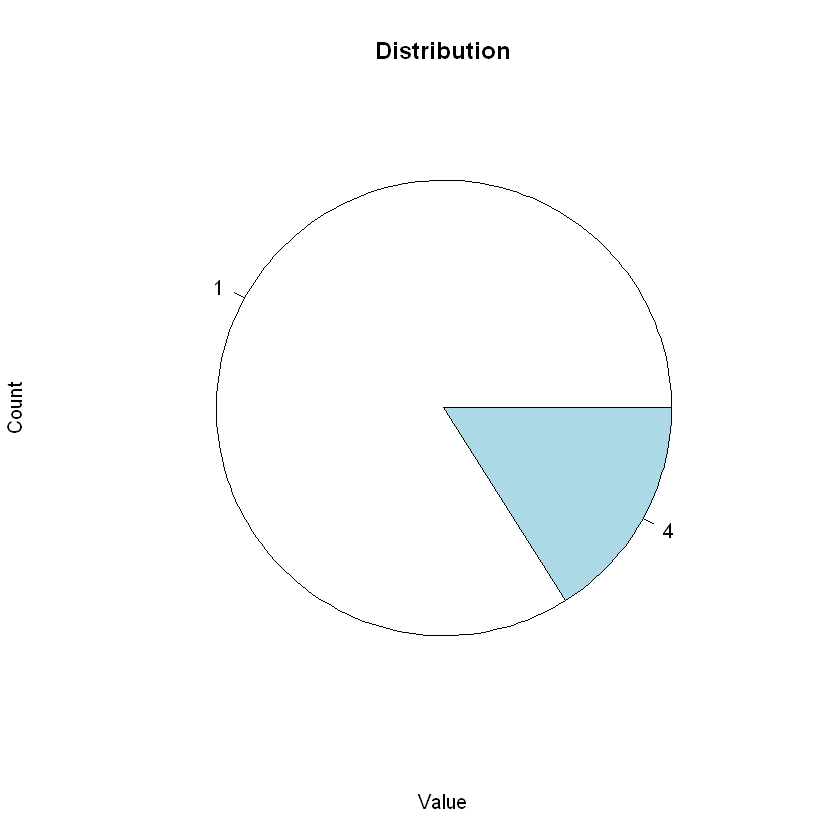

In [276]:
plot_pie_chart(data$AcqTyp)
# 1 - Cash
# 4 - Credit Enhancement

In [277]:
# Account for missing data
print(paste("Number of records with missing records -", nrow(data)))
data = subset(data, BoGender != 3 & BoRace != 7 & BoAge != 99 & BoEth != 3 & BoCreditScor != 9)
print(paste("Number of records without missing records -", nrow(data)))

[1] "Number of records with missing records - 55990"
[1] "Number of records without missing records - 48148"


In [278]:
summary(data)

  Assigned.ID          Bank                MSA            MinPer      
 Min.   :2072282   Length:48148       Min.   :10100   Min.   :  0.00  
 1st Qu.:2085951   Class :character   1st Qu.:19380   1st Qu.:  5.27  
 Median :2100541   Mode  :character   Median :30700   Median : 11.05  
 Mean   :2100116                      Mean   :36346   Mean   : 18.02  
 3rd Qu.:2113856                      3rd Qu.:41940   3rd Qu.: 22.81  
 Max.   :2128272                      Max.   :99999   Max.   :100.00  
    LocMedY          Tractrat          Income            IncRat       
 Min.   : 18267   Min.   :0.0000   Min.   :   3396   Min.   : 0.0377  
 1st Qu.: 61182   1st Qu.:0.9386   1st Qu.:  60000   1st Qu.: 0.8926  
 Median : 67016   Median :1.1082   Median :  90518   Median : 1.3183  
 Mean   : 69133   Mean   :1.1745   Mean   : 108336   Mean   : 1.5680  
 3rd Qu.: 73402   3rd Qu.:1.3588   3rd Qu.: 132684   3rd Qu.: 1.8943  
 Max.   :121130   Max.   :3.9037   Max.   :4205372   Max.   :68.1584  
      

In [279]:
print(paste("Number of columns -", length(data)))
print(paste("Number of records -", nrow(data)))

[1] "Number of columns - 28"
[1] "Number of records - 48148"


In [280]:
write.csv(data,"../Datasets/Cleaned_data.csv", row.names = TRUE)